In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sbm
import litebird_sim as lbs
import lbsim_tools as lbt
import os
from sbm import Field, ScanFields, SignalFields, plot_maps

In [2]:
# Load single detector map
base_path = "../sbm/maps"
sf_bore = ScanFields.load_det(base_path, "nside128_boresight")

base_path = "../../maps/crosslink_maps/crosslinks_2407/nside_128"
data = ScanFields()
ch_id = 10
channel = data.all_channels[ch_id]
sf_ch = ScanFields.load_channel(base_path, channel)
print("Channel: ", channel)
print("Ndet: ", sf_ch.ndet*2)


imo_version = "v2"
imo = lbs.Imo(flatfile_location="/home/heavybird/home/M2/takase/program/litebird/litebird_imo/IMO")
print(imo.imoobject.releases)

r = 0.001
inst = sbm.get_instrument_table(imo, imo_version="v2")
inst

Channel:  L3-119
Ndet:  144
{'v2': <libinsdb.objects.Release object at 0x73aaf2c10d30>}


,channel,frequency,bandwidth,depth_p,fwhm,net_detector_ukrts,net_channel_ukrts,ndet,f_sky,status,reference,type,experiment,telescope
0,L1-040,40.0,12.0,37.422215,70.5,114.63,18.498337,48,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
1,L2-050,50.0,15.0,33.462962,58.5,72.48,16.541221,24,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
2,L1-060,60.0,14.0,21.311369,51.1,65.28,10.534515,48,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
3,L3-068,68.0,16.0,19.911270,41.6,105.64,9.842426,144,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
4,L2-068,68.0,18.0,31.768577,47.1,68.81,15.703662,24,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
5,L4-078,78.0,18.0,15.551675,36.9,82.51,7.687415,144,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
6,L1-078,78.0,18.0,19.133875,43.8,58.61,9.458148,48,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
7,L3-089,89.0,20.0,12.285276,33.0,65.18,6.072788,144,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
8,L2-089,89.0,20.0,28.776855,41.5,62.33,14.224811,24,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT
9,L4-100,100.0,23.0,10.343909,30.2,54.88,5.113142,144,1.0,forecast,IMo-v2,satellite,LiteBIRD,LFT


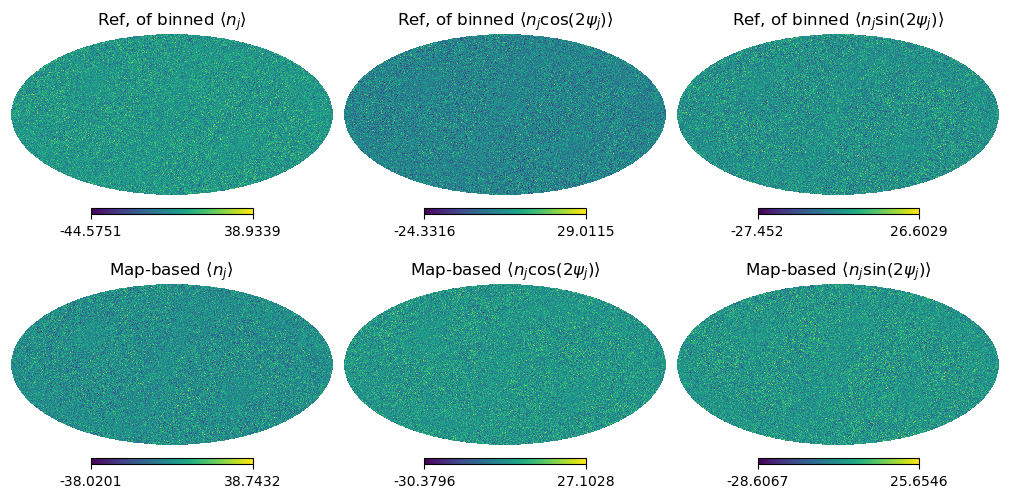

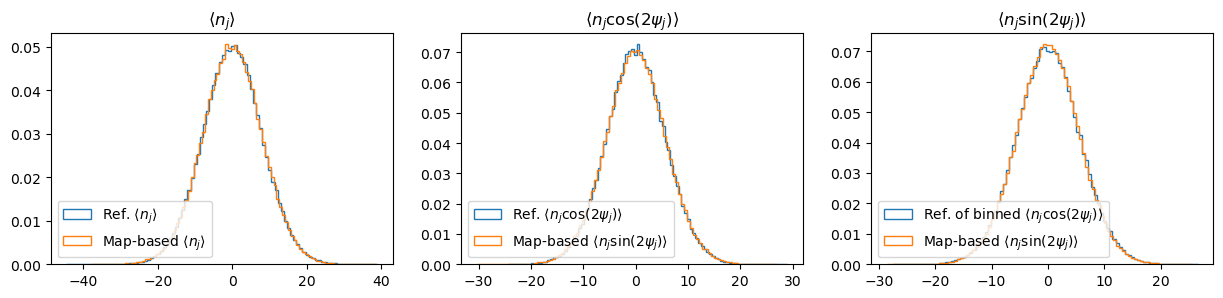

In [3]:
net_ukrts = 100
sf_bore.generate_noise_pdf(net_ukrts=net_ukrts, diff=False)
noise_bore = sf_bore.generate_noise(12345)

data = np.load("./240904_nside128_baseline_19.0Hz_0.0rpm_1year_1arcmin_seed33_3x3_net_ukrts=100.0.npz")
total_noise_ref = data["total_signal"][:,0]

plt.figure(figsize=(10,5))
hp.mollview(noise_bore[0], sub=(2,3,1), title=r"Ref, of binned $\langle n_j \rangle$")
hp.mollview(noise_bore[1], sub=(2,3,2), title=r"Ref, of binned $\langle n_j \cos(2\psi_j) \rangle$")
hp.mollview(noise_bore[2], sub=(2,3,3), title=r"Ref, of binned $\langle n_j \sin(2\psi_j) \rangle$")

hp.mollview(total_noise_ref[0], sub=(2,3,4), title=r"Map-based $\langle n_j \rangle$")
hp.mollview(total_noise_ref[1], sub=(2,3,5), title=r"Map-based $\langle n_j \cos(2\psi_j) \rangle$")
hp.mollview(total_noise_ref[2], sub=(2,3,6), title=r"Map-based $\langle n_j \sin(2\psi_j) \rangle$")

density = True
fig, ax = plt.subplots(1,3, figsize=(15,3))
ax[0].hist(noise_bore[0], bins=100, density=density, histtype="step", label=r"Ref. $\langle n_j \rangle$")
ax[0].hist(total_noise_ref[0], bins=100, density=density, histtype="step", label=r"Map-based $\langle n_j \rangle$")
ax[1].hist(noise_bore[1], bins=100, density=density, histtype="step", label=r"Ref. $\langle n_j\cos(2\psi_j) \rangle$")
ax[1].hist(total_noise_ref[1], bins=100, density=density, histtype="step", label=r"Map-based $\langle n_j\sin(2\psi_j) \rangle$")
ax[2].hist(noise_bore[2], bins=100, density=density, histtype="step", label=r"Ref. of binned $\langle n_j\cos(2\psi_j) \rangle$")
ax[2].hist(total_noise_ref[2], bins=100, density=density, histtype="step", label=r"Map-based $\langle n_j\sin(2\psi_j) \rangle$")

ax[0].set_title(r"$\langle n_j \rangle$")
ax[1].set_title(r"$\langle n_j \cos(2\psi_j) \rangle$")
ax[2].set_title(r"$\langle n_j \sin(2\psi_j) \rangle$")
ax[0].legend(loc="lower left")
ax[1].legend(loc="lower left")
ax[2].legend(loc="lower left")

cl_ref = hp.anafast(total_noise_ref)
cl_bore = hp.anafast(noise_bore)

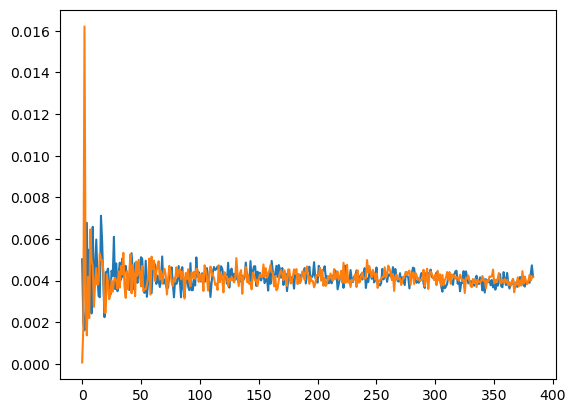

In [4]:
plt.plot(cl_ref[0])
plt.plot(cl_bore[0])

In [5]:
dirpath = os.path.join(base_path, channel)
filenames = os.listdir(dirpath)
filenames = [os.path.splitext(filename)[0] for filename in filenames]
sfs = [ScanFields.load_det(dirpath, filename) for filename in filenames]

In [6]:
noise_list = []
for i,sf in enumerate(sfs):
    sf.generate_noise_pdf(imo=imo)
    noise_list.append(sf.generate_noise(i))
noise_list = np.array(noise_list)
noise_mean = noise_list.mean(0)

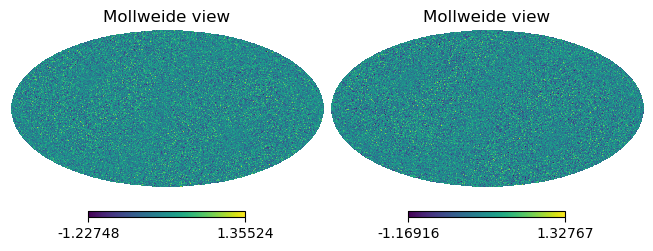

In [7]:
sf_ch.generate_noise_pdf(imo)
noise_ch = sf_ch.generate_noise(1234)

hp.mollview(noise_ch[0], sub=(1,2,2))
hp.mollview(noise_mean[0], sub=(1,2,1))

In [8]:
cl_ch = hp.anafast(noise_ch)
cl_mean = hp.anafast(noise_mean)

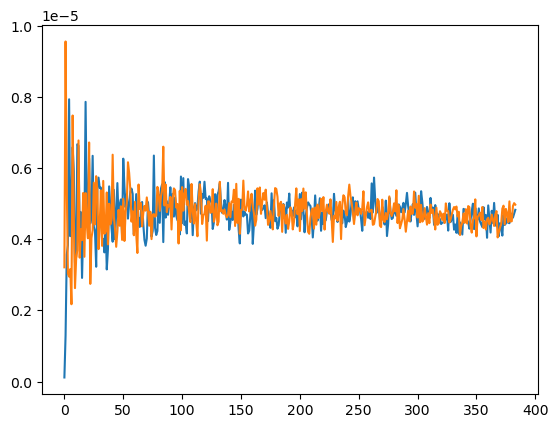

In [9]:
plt.plot(cl_ch[0], label="ch")
plt.plot(cl_mean[0], label="48")

In [84]:
# Load single detector map
base_path = "../sbm/maps"
scan_field = ScanFields.load_det(base_path, "boresight")

In [85]:
data = np.load("./240904_nside128_baseline_19.0Hz_0.0rpm_3year_1arcmin_seed33_3x3_net_ukrts=100.0.npz")
noise_ref = data["outmap"][:,0]
total_noise_ref = data["total_signal"][:,0]

scan_field.generate_noise_pdf(net_ukrts=100, diff=False)
noise = scan_field.generate_noise(12345)

noise = total_noise_ref
noise_field = SignalFields(
    Field(noise[0], spin=0),
    Field((noise[1]+1j*noise[2]), spin=2),
    Field((noise[1]+1j*noise[2]), spin=-2),
)

mdim = 3
output_map = scan_field.map_make(noise_field, mdim=mdim)
residual = output_map

In [86]:
A = scan_field._get_covmat(3)
b = total_noise_ref
residual = np.empty_like(b)
for i in range(b.shape[1]):
    residual[:,i] = np.linalg.solve(A[:,:,i], b[:,i])

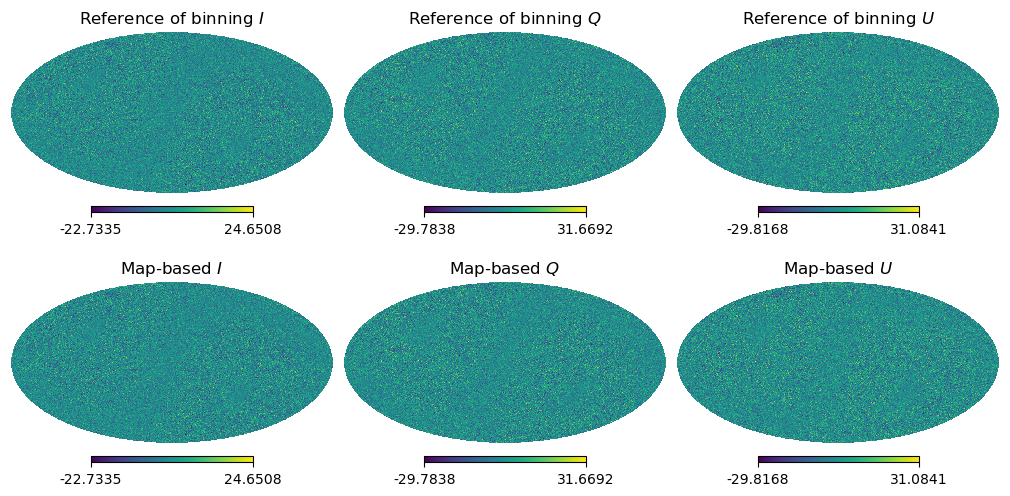

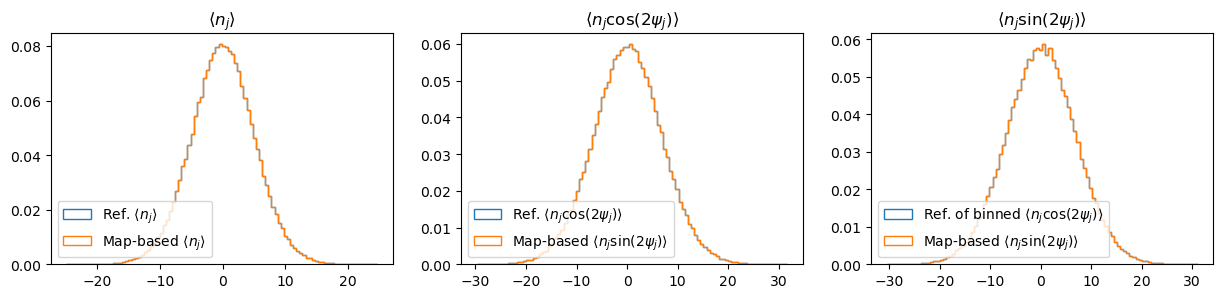

In [87]:
plt.figure(figsize=(10,5))
hp.mollview(noise_ref[0], sub=(2,3,1), title="Reference of binning $I$")
hp.mollview(noise_ref[1], sub=(2,3,2), title="Reference of binning $Q$")
hp.mollview(noise_ref[2], sub=(2,3,3), title="Reference of binning $U$")

hp.mollview(residual[0], sub=(2,3,4), title="Map-based $I$")
hp.mollview(residual[1], sub=(2,3,5), title="Map-based $Q$")
hp.mollview(residual[2], sub=(2,3,6), title="Map-based $U$")

density = True
fig, ax = plt.subplots(1,3, figsize=(15,3))

ax[0].hist(noise_ref[0], bins=100, density=density, histtype="step", label=r"Ref. $\langle n_j \rangle$")
ax[1].hist(noise_ref[1], bins=100, density=density, histtype="step", label=r"Ref. $\langle n_j\cos(2\psi_j) \rangle$")
ax[2].hist(noise_ref[2], bins=100, density=density, histtype="step", label=r"Ref. of binned $\langle n_j\cos(2\psi_j) \rangle$")

ax[0].hist(residual[0], bins=100, density=density, histtype="step", label=r"Map-based $\langle n_j \rangle$")
ax[1].hist(residual[1], bins=100, density=density, histtype="step", label=r"Map-based $\langle n_j\sin(2\psi_j) \rangle$")
ax[2].hist(residual[2], bins=100, density=density, histtype="step", label=r"Map-based $\langle n_j\sin(2\psi_j) \rangle$")

ax[0].set_title(r"$\langle n_j \rangle$")
ax[1].set_title(r"$\langle n_j \cos(2\psi_j) \rangle$")
ax[2].set_title(r"$\langle n_j \sin(2\psi_j) \rangle$")
ax[0].legend(loc="lower left")
ax[1].legend(loc="lower left")
ax[2].legend(loc="lower left")

In [88]:
res = residual - noise_ref

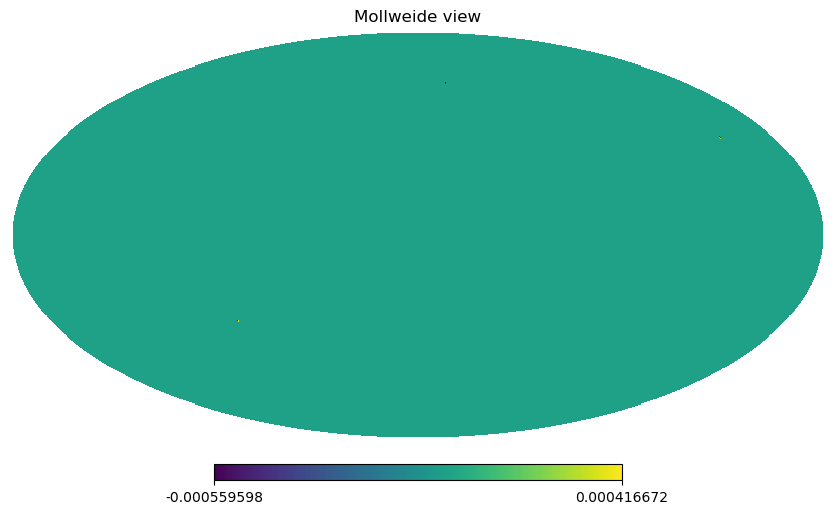

In [89]:
hp.mollview(res[2])

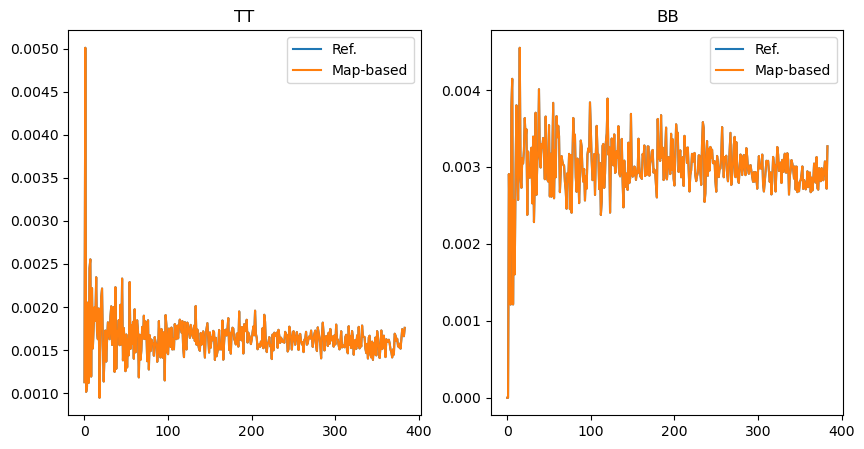

In [90]:
cl_ref = hp.anafast(noise_ref)
cl_residual = hp.anafast(residual)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(cl_ref[0], "-", label="Ref.")
ax[0].plot(cl_residual[0], "-", label="Map-based")
ax[0].set_title("TT")
ax[0].legend(loc="upper right")

ax[1].plot(cl_ref[2], "-", label="Ref.")
ax[1].plot(cl_residual[2], "-", label="Map-based")
ax[1].set_title("BB")
ax[1].legend(loc="upper right")


/tmp/ipykernel_3140562/3163199516.py:7: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(cl_ref[2]/cl_residual[2], "-", label="Ref.")


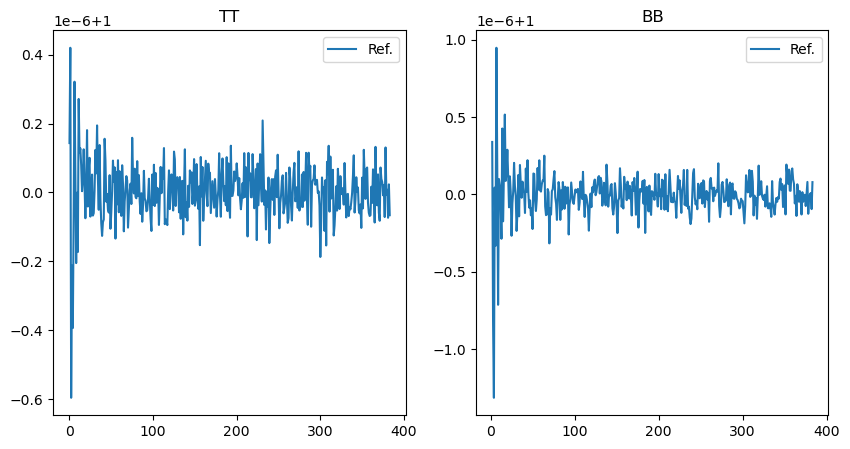

In [91]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(cl_ref[0]/cl_residual[0], "-", label="Ref.")

ax[0].set_title("TT")
ax[0].legend(loc="upper right")

ax[1].plot(cl_ref[2]/cl_residual[2], "-", label="Ref.")

ax[1].set_title("BB")
ax[1].legend(loc="upper right")